In [1]:
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from osgeo.gdal import Open

In [2]:
B4_before = io.imread('E:/Change_detection/Before/B4.tif')
B4_after = io.imread('E:/Change_detection/After/B4.tif')

B6_before = io.imread('E:/Change_detection/Before/B6.tif')
B6_after = io.imread('E:/Change_detection/After/B6.tif')

B7_before = io.imread('E:/Change_detection/Before/B7.tif')
B7_after = io.imread('E:/Change_detection/After/B7.tif')

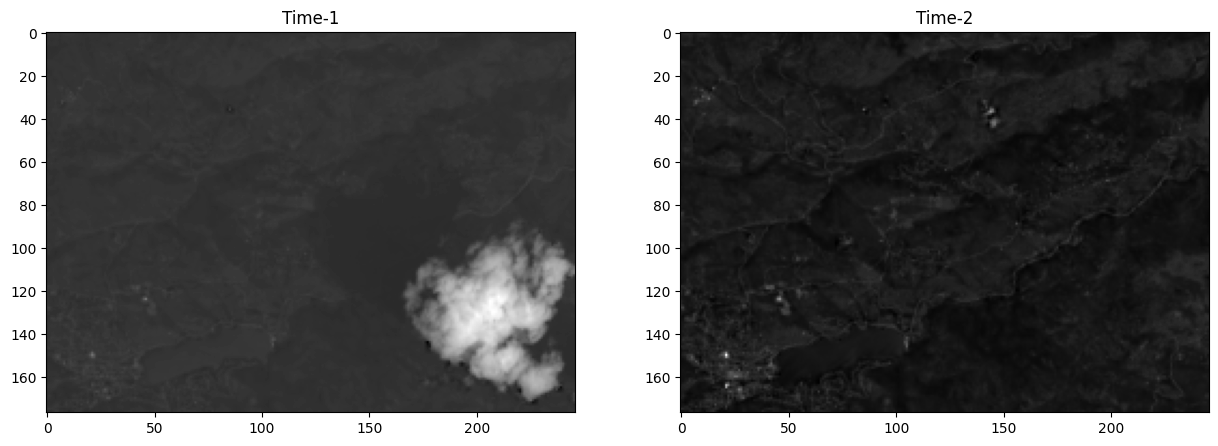

In [3]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,2,1)
plt.title('Time-1')
plt.imshow(B4_before, cmap=cm.gray)
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,2,2)
plt.title('Time-2')
plt.imshow(B4_after, cmap=cm.gray)
plt.show()

In [4]:
sub = (B4_before)-(B4_after)
divide = (B4_before) / (B4_after)

C:\Users\arad7\AppData\Local\Temp\ipykernel_13816\4205047237.py:2: RuntimeWarning: divide by zero encountered in divide
  divide = (B4_before) / (B4_after)


In [6]:
sub

array([[ -41,  -71,  -92, ...,   35,    9,   22],
       [ -21,  -80,  -98, ...,    8,   10,    9],
       [ -34,  -47,  -44, ...,   -9,    8,    7],
       ...,
       [  81,  -18,  -34, ...,  -12,  -39, -156],
       [ -84,   42,  100, ...,   19,   18,  -90],
       [  54,  -28,   -4, ...,   34,   66,    2]], dtype=int16)

In [7]:
divide

array([[0.90807175, 0.85084034, 0.8110883 , ..., 1.21604938, 1.04090909,
        1.08461538],
       [0.94656489, 0.8249453 , 0.79918033, ..., 1.04      , 1.04255319,
        1.03040541],
       [0.90659341, 0.88040712, 0.88659794, ..., 0.96341463, 1.02684564,
        1.02017291],
       ...,
       [1.3253012 , 0.93639576, 0.90633609, ..., 0.95588235, 0.85447761,
        0.45070423],
       [0.84473198, 1.08860759, 1.27472527, ..., 1.07307692, 1.0669145 ,
        0.68421053],
       [1.24657534, 0.84180791, 0.984     , ..., 1.12546125, 1.24354244,
        1.00699301]])

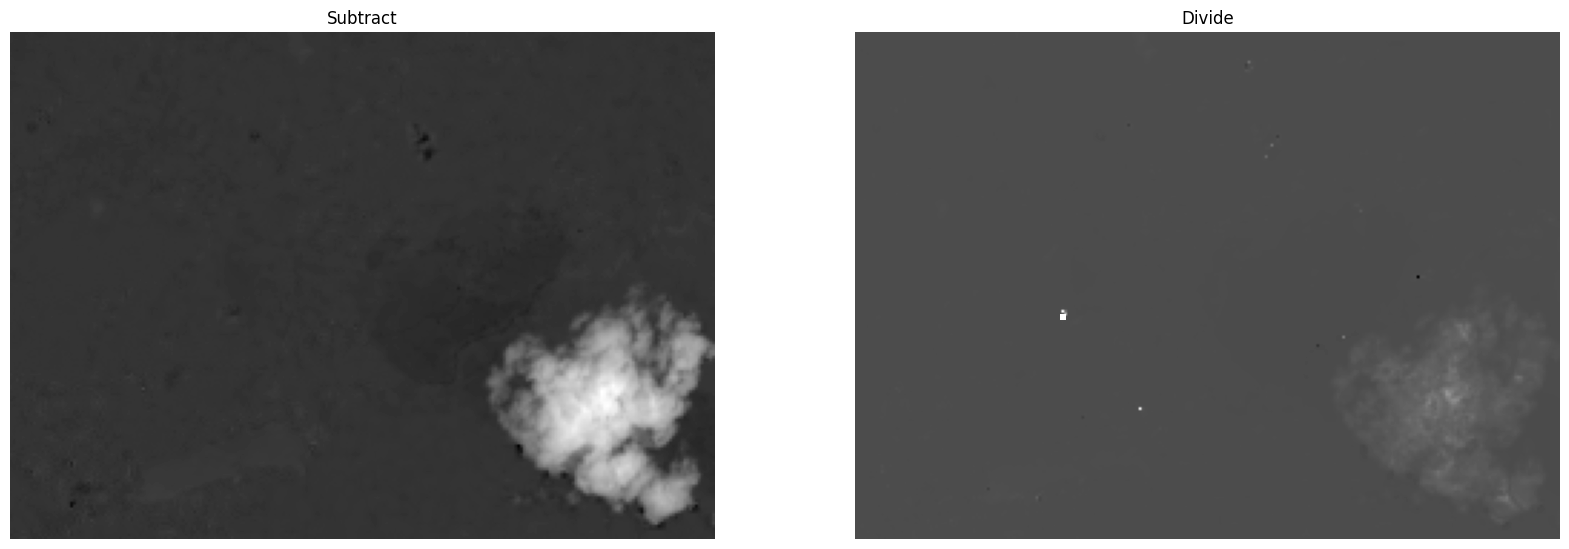

In [9]:
plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,2,1)
plt.title('Subtract')
plt.imshow(sub, cmap=cm.gray)
plt.axis('off')
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,2,2)
plt.title('Divide')
plt.imshow(divide, cmap=cm.gray)
plt.axis('off')
plt.show()

In [10]:
NBR_before = (B4_before - B7_before)/(B4_before + B7_before)
NBR_after = (B4_after - B7_after)/ (B4_after + B7_after)
dNBR = NBR_before - NBR_after

C:\Users\arad7\AppData\Local\Temp\ipykernel_13816\1903423511.py:1: RuntimeWarning: divide by zero encountered in divide
  NBR_before = (B4_before - B7_before)/(B4_before + B7_before)


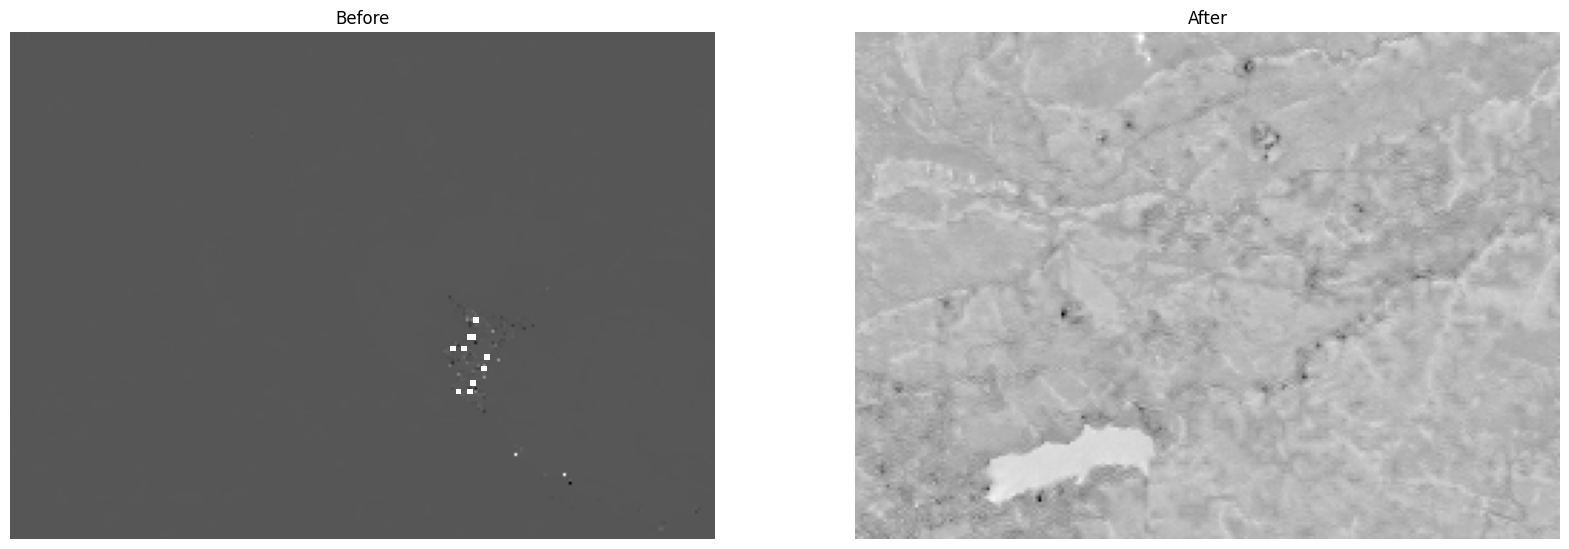

In [25]:
plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(dNBR, cmap=cm.gray)
plt.axis('off')

#After
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(NBR_after, cmap=cm.gray)
plt.axis('off')
plt.show()

In [47]:
threshold = 0.7

In [48]:
burn = dNBR > threshold

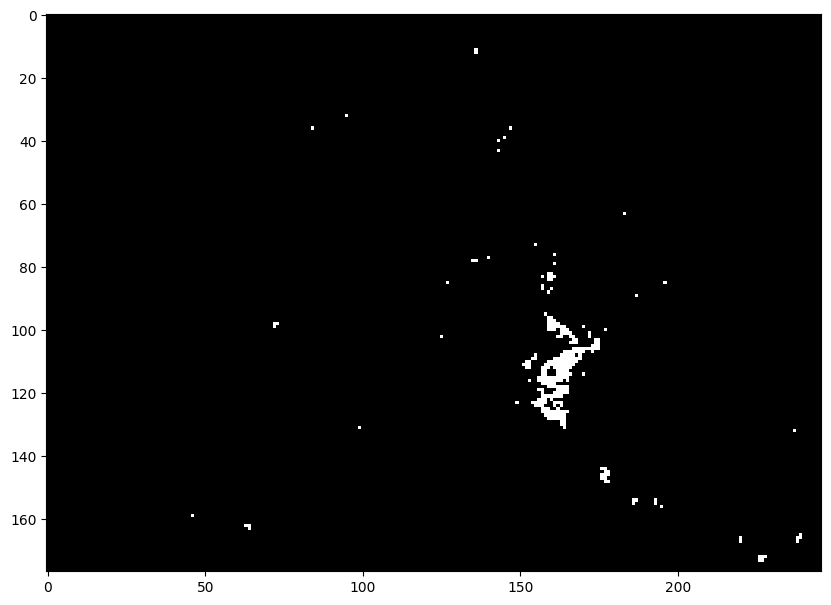

In [49]:
plt.figure(figsize=(10,15))
plt.imshow(burn, cmap=cm.gray)
plt.show()

Change Vector Analysis (CVA)

In [50]:
B5_before = io.imread('E:/Change_detection/Before/B5.tif')
B5_after = io.imread('E:/Change_detection/After/B5.tif')

In [51]:
CM = np.empty(B4_after.shape)
CD = np.empty(B4_after.shape)

In [52]:
from math import sqrt

In [53]:
for i in range(len(B4_after)):
    for j in range(len(B4_after[0])):
        change_magnitude = sqrt((B4_before[i][j] - B4_after[i][j])**2 + (B5_before[i][j] - B5_after[i][j])**2)
        
        if B4_after[i][j] - B4_before[i][j] < 0 and B5_after[i][j] - B5_before[i][j] < 0:
            change_direction = 1
        elif B4_after[i][j] - B4_before[i][j] > 0 and B5_after[i][j] - B5_before[i][j] < 0:
            change_direction = 2
        elif B4_after[i][j] - B4_before[i][j] < 0 and B5_after[i][j] - B5_before[i][j] > 0:
            change_direction = 3
        elif B4_after[i][j] - B4_before[i][j] > 0 and B5_after[i][j] - B5_before[i][j] > 0:
            change_direction = 4
            
        CM[i][j] = change_magnitude
        CD[i][j] = change_direction

In [54]:
CD

array([[4., 4., 4., ..., 1., 1., 1.],
       [4., 4., 4., ..., 1., 1., 1.],
       [4., 4., 4., ..., 4., 1., 3.],
       ...,
       [1., 2., 2., ..., 2., 4., 4.],
       [4., 3., 1., ..., 1., 1., 4.],
       [1., 2., 4., ..., 1., 1., 1.]])

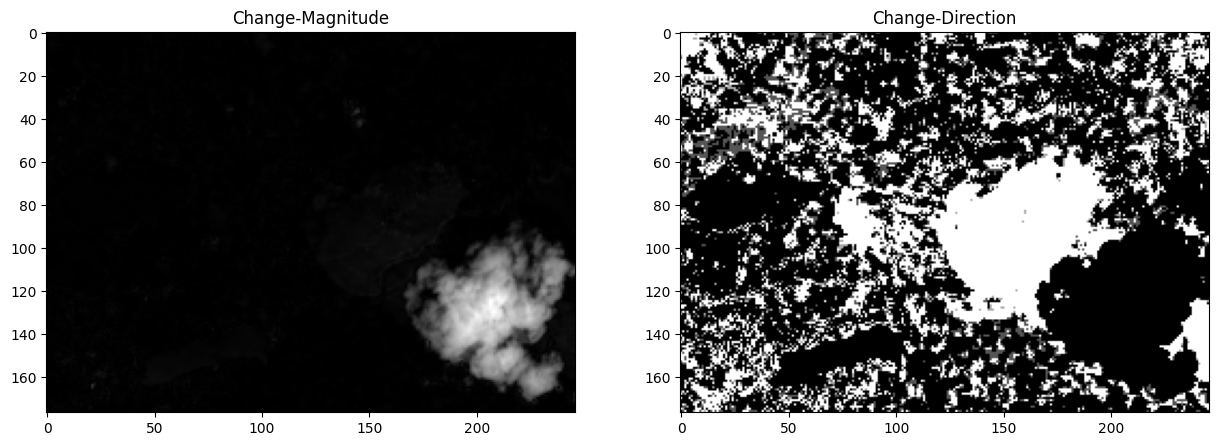

In [55]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)
plt.subplot(1, 2, 1)
plt.title('Change-Magnitude')
plt.imshow(CM, cmap=cm.gray)

plt.subplots_adjust(hspace=0.5)
plt.subplot(1, 2, 2)
plt.title('Change-Direction')
plt.imshow(CD, cmap=cm.gray)
plt.show()

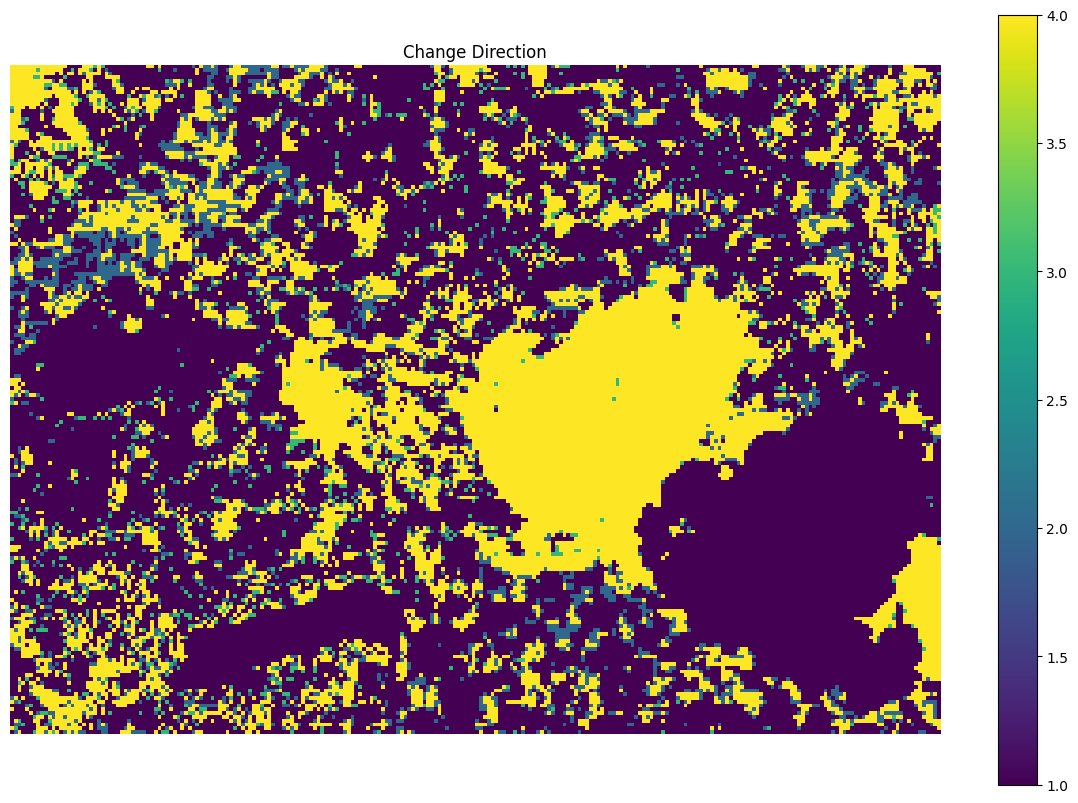

In [59]:
plt.figure(figsize=(15,10))
plt.imshow(CD)
plt.title('Change Direction')
plt.colorbar()
plt.axis('off')
plt.show()

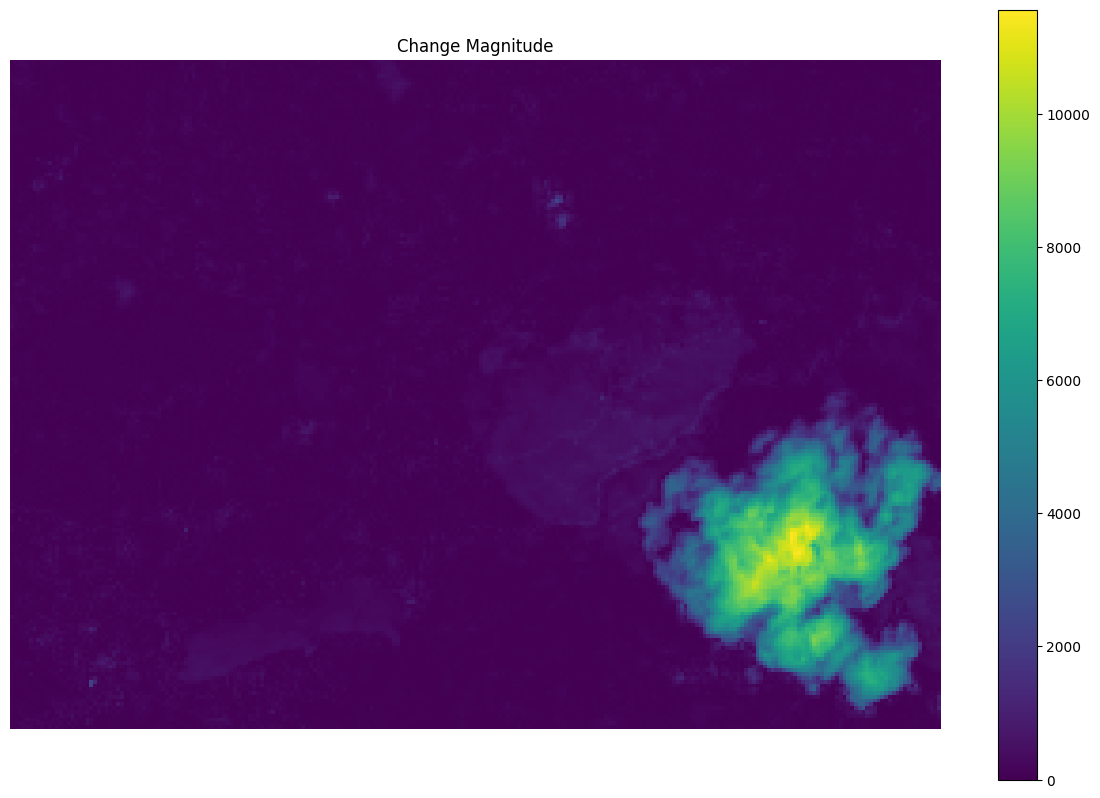

In [60]:
plt.figure(figsize=(15,10))
plt.imshow(CM)
plt.title('Change Magnitude')
plt.colorbar()
plt.axis('off')
plt.show()

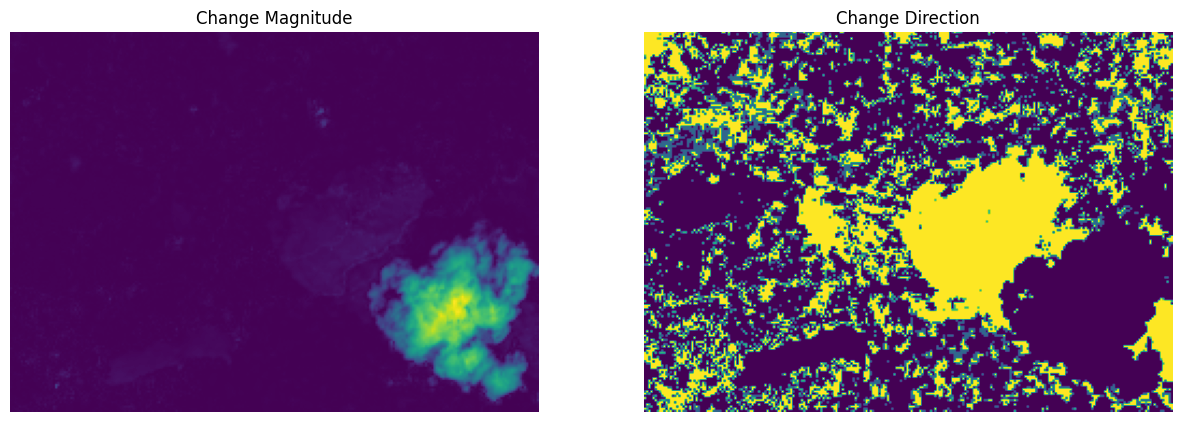

In [64]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)
plt.subplot(1, 2, 1)
plt.title('Change Magnitude')
plt.axis('off')
plt.imshow(CM)

plt.subplots_adjust(hspace=0.5)
plt.subplot(1, 2, 2)
plt.title('Change Direction')
plt.axis('off')
plt.imshow(CD)
plt.show()